***
# Classification Project
# A Prediction Model for Estimating Cancer Rate Categories Across Countries

**Objective:**
To develop a classification model of estimation of cancer categories.

**Importing Libraries**

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

from operator import add,mul,truediv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.ensemble import StackingClassifier

## 1. Data Collection and Overview 

The target variable for the study is:
* <span style="color: #FF0000">CANRAT</span> - Dichotomized category based on age-standardized cancer rates, per 100K population (2022)

The predictor variables for the study are:
* <span style="color: #FF0000">GDPPER</span> - GDP per person employed, current US Dollars (2020)
* <span style="color: #FF0000">URBPOP</span> - Urban population, % of total population (2020)
* <span style="color: #FF0000">PATRES</span> - Patent applications by residents, total count (2020)
* <span style="color: #FF0000">RNDGDP</span> - Research and development expenditure, % of GDP (2020)
* <span style="color: #FF0000">POPGRO</span> - Population growth, annual % (2020)
* <span style="color: #FF0000">LIFEXP</span> - Life expectancy at birth, total in years (2020)
* <span style="color: #FF0000">TUBINC</span> - Incidence of tuberculosis, per 100K population (2020)
* <span style="color: #FF0000">DTHCMD</span> - Cause of death by communicable diseases and maternal, prenatal and nutrition conditions,  % of total (2019)
* <span style="color: #FF0000">AGRLND</span> - Agricultural land,  % of land area (2020)
* <span style="color: #FF0000">GHGEMI</span> - Total greenhouse gas emissions, kt of CO2 equivalent (2020)
* <span style="color: #FF0000">RELOUT</span> - Renewable electricity output, % of total electricity output (2015)
* <span style="color: #FF0000">METEMI</span> - Methane emissions, kt of CO2 equivalent (2020)
* <span style="color: #FF0000">FORARE</span> - Forest area, % of land area (2020)
* <span style="color: #FF0000">CO2EMI</span> - CO2 emissions, metric tons per capita (2020)
* <span style="color: #FF0000">PM2EXP</span> - PM2.5 air pollution, population exposed to levels exceeding WHO guideline value,  % of total (2017)
* <span style="color: #FF0000">POPDEN</span> - Population density, people per sq. km of land area (2020)
* <span style="color: #FF0000">GDPCAP</span> - GDP per capita, current US Dollars (2020)
* <span style="color: #FF0000">ENRTER</span> - Tertiary school enrollment, % gross (2020)
* <span style="color: #FF0000">HDICAT</span> - Human development index, ordered category (2020)
* <span style="color: #FF0000">EPISCO</span> - Environment performance index , score (2022)

**The dataset and the description are retrieved from [github JohnPaulinePineda](https://github.com/JohnPaulinePineda/Supervised-Machine-Learning-Classification-Final-Assignment/blob/main/CategoricalCancerRates.csv)**


In [23]:
crate_pd = pd.read_csv('./dataset/CategoricalCancerRates.csv')
crate_pd.head()

,COUNTRY,CANRAT,GDPPER,URBPOP,PATRES,RNDGDP,POPGRO,LIFEXP,TUBINC,DTHCMD,...,RELOUT,METEMI,FORARE,CO2EMI,PM2EXP,POPDEN,ENRTER,GDPCAP,HDICAT,EPISCO
0,Australia,High,98380.63601,86.241,2368.0,NaN,1.235701,83.200000,7.2,4.941054,...,13.637841,131484.763200,17.421315,14.772658,24.893584,3.335312,110.139221,51722.06900,VH,60.1
1,New Zealand,High,77541.76438,86.699,348.0,NaN,2.204789,82.256098,7.2,4.354730,...,80.081439,32241.937000,37.570126,6.160799,NaN,19.331586,75.734833,41760.59478,VH,56.7
2,Ireland,High,198405.87500,63.653,75.0,1.23244,1.029111,82.556098,5.3,5.684596,...,27.965408,15252.824630,11.351720,6.768228,0.274092,72.367281,74.680313,85420.19086,VH,57.4
3,United States,High,130941.63690,82.664,269586.0,3.42287,0.964348,76.980488,2.3,5.302060,...,13.228593,748241.402900,33.866926,13.032828,3.343170,36.240985,87.567657,63528.63430,VH,51.1
4,Denmark,High,113300.60110,88.116,1261.0,2.96873,0.291641,81.602439,4.1,6.826140,...,65.505925,7778.773921,15.711000,4.691237,56.914456,145.785100,82.664330,60915.42440,VH,77.9


In [24]:
crate_pd.shape

(177, 22)

In [25]:
crate_pd.dtypes

COUNTRY     object
CANRAT      object
GDPPER     float64
URBPOP     float64
PATRES     float64
RNDGDP     float64
POPGRO     float64
LIFEXP     float64
TUBINC     float64
DTHCMD     float64
AGRLND     float64
GHGEMI     float64
RELOUT     float64
METEMI     float64
FORARE     float64
CO2EMI     float64
PM2EXP     float64
POPDEN     float64
ENRTER     float64
GDPCAP     float64
HDICAT      object
EPISCO     float64
dtype: object

**Description :**
I have 177 observations and 22 coloumns where COUNTRY is the unique values, HDICAT is categorial variable and our target value is CANRAT

## 2. Data Preprocessing and Cleaning

### Data Cleaning

In [26]:
# Check duplicated rows
crate_pd.duplicated().sum()

0

In [27]:
data_type_list = list(crate_pd.dtypes)
variable_name_list = list(crate_pd.columns)
row_count_list = list([len(crate_pd)] * len(crate_pd.columns))
null_count_list = list(crate_pd.isna().sum(axis=0))
non_null_count_list = list(crate_pd.count())
fill_rate_list = map(truediv, non_null_count_list, row_count_list)
all_column_quality_summary = pd.DataFrame(zip(variable_name_list,
                                              data_type_list,
                                              row_count_list,
                                              non_null_count_list,
                                              null_count_list,
                                              fill_rate_list), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count',                                                 
                                                 'Fill.Rate'])
display(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)].sort_values(by=['Fill.Rate'], ascending=True))

,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count,Fill.Rate
5,RNDGDP,float64,177,74,103,0.418079
4,PATRES,float64,177,108,69,0.610169
18,ENRTER,float64,177,116,61,0.655367
12,RELOUT,float64,177,153,24,0.864407
21,EPISCO,float64,177,165,12,0.932203
2,GDPPER,float64,177,165,12,0.932203
16,PM2EXP,float64,177,167,10,0.943503
20,HDICAT,object,177,167,10,0.943503
15,CO2EMI,float64,177,170,7,0.960452
13,METEMI,float64,177,170,7,0.960452


In [28]:
len(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)])

20

**Descriptions :** Based on this table, there are missing data for 20 variables where  of them, 'RNDGDP', 'PATRES', 'ENRTER', and 'RELOUT' with fill rate <0.9. So I decided to drop the coloumns from here onwards.

In [29]:
column_low_fill_rate = all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<0.90)]
crate_pd = crate_pd.drop(column_low_fill_rate['Column.Name'].values.tolist(), axis=1)
crate_pd.shape

(177, 18)

In [30]:
crate_pd.isnull().sum().sort_values(ascending=False)

EPISCO     12
GDPPER     12
PM2EXP     10
HDICAT     10
CO2EMI      7
DTHCMD      7
METEMI      7
GDPCAP      7
GHGEMI      7
FORARE      4
URBPOP      3
TUBINC      3
AGRLND      3
LIFEXP      3
POPGRO      3
POPDEN      3
CANRAT      0
COUNTRY     0
dtype: int64

I decided to just drop the lines that have missing values

In [31]:
crate_pd = crate_pd.dropna()
crate_pd.shape

(155, 18)

### Centering and Scaling

In [32]:
crate_npd = crate_pd.select_dtypes(include='number')
standardization_scaler = StandardScaler()
crate_npd =pd.DataFrame(standardization_scaler.fit_transform(crate_npd), columns = crate_npd.columns)

### Data Encoding

In [33]:
crate_cpd = crate_pd.select_dtypes(include=object)
crate_cpd = pd.DataFrame(crate_cpd.loc[:, 'HDICAT'].to_list(), columns=['HDICAT'])
crate_cpd = pd.get_dummies(crate_cpd, columns=['HDICAT'])

### Preprocessed Data Description

In [34]:
crate_dpd = pd.concat([crate_npd, crate_cpd], axis=1, join='inner')
crate_dpd.shape

(155, 19)

In [35]:
crate = pd.concat([crate_dpd, crate_pd['CANRAT']], axis=1, join='inner')
crate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 154
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GDPPER     136 non-null    float64
 1   URBPOP     136 non-null    float64
 2   POPGRO     136 non-null    float64
 3   LIFEXP     136 non-null    float64
 4   TUBINC     136 non-null    float64
 5   DTHCMD     136 non-null    float64
 6   AGRLND     136 non-null    float64
 7   GHGEMI     136 non-null    float64
 8   METEMI     136 non-null    float64
 9   FORARE     136 non-null    float64
 10  CO2EMI     136 non-null    float64
 11  PM2EXP     136 non-null    float64
 12  POPDEN     136 non-null    float64
 13  GDPCAP     136 non-null    float64
 14  EPISCO     136 non-null    float64
 15  HDICAT_H   136 non-null    bool   
 16  HDICAT_L   136 non-null    bool   
 17  HDICAT_M   136 non-null    bool   
 18  HDICAT_VH  136 non-null    bool   
 19  CANRAT     136 non-null    object 
dtypes: bool(4), flo

## 3.Explatory Data Analysis (EDA)

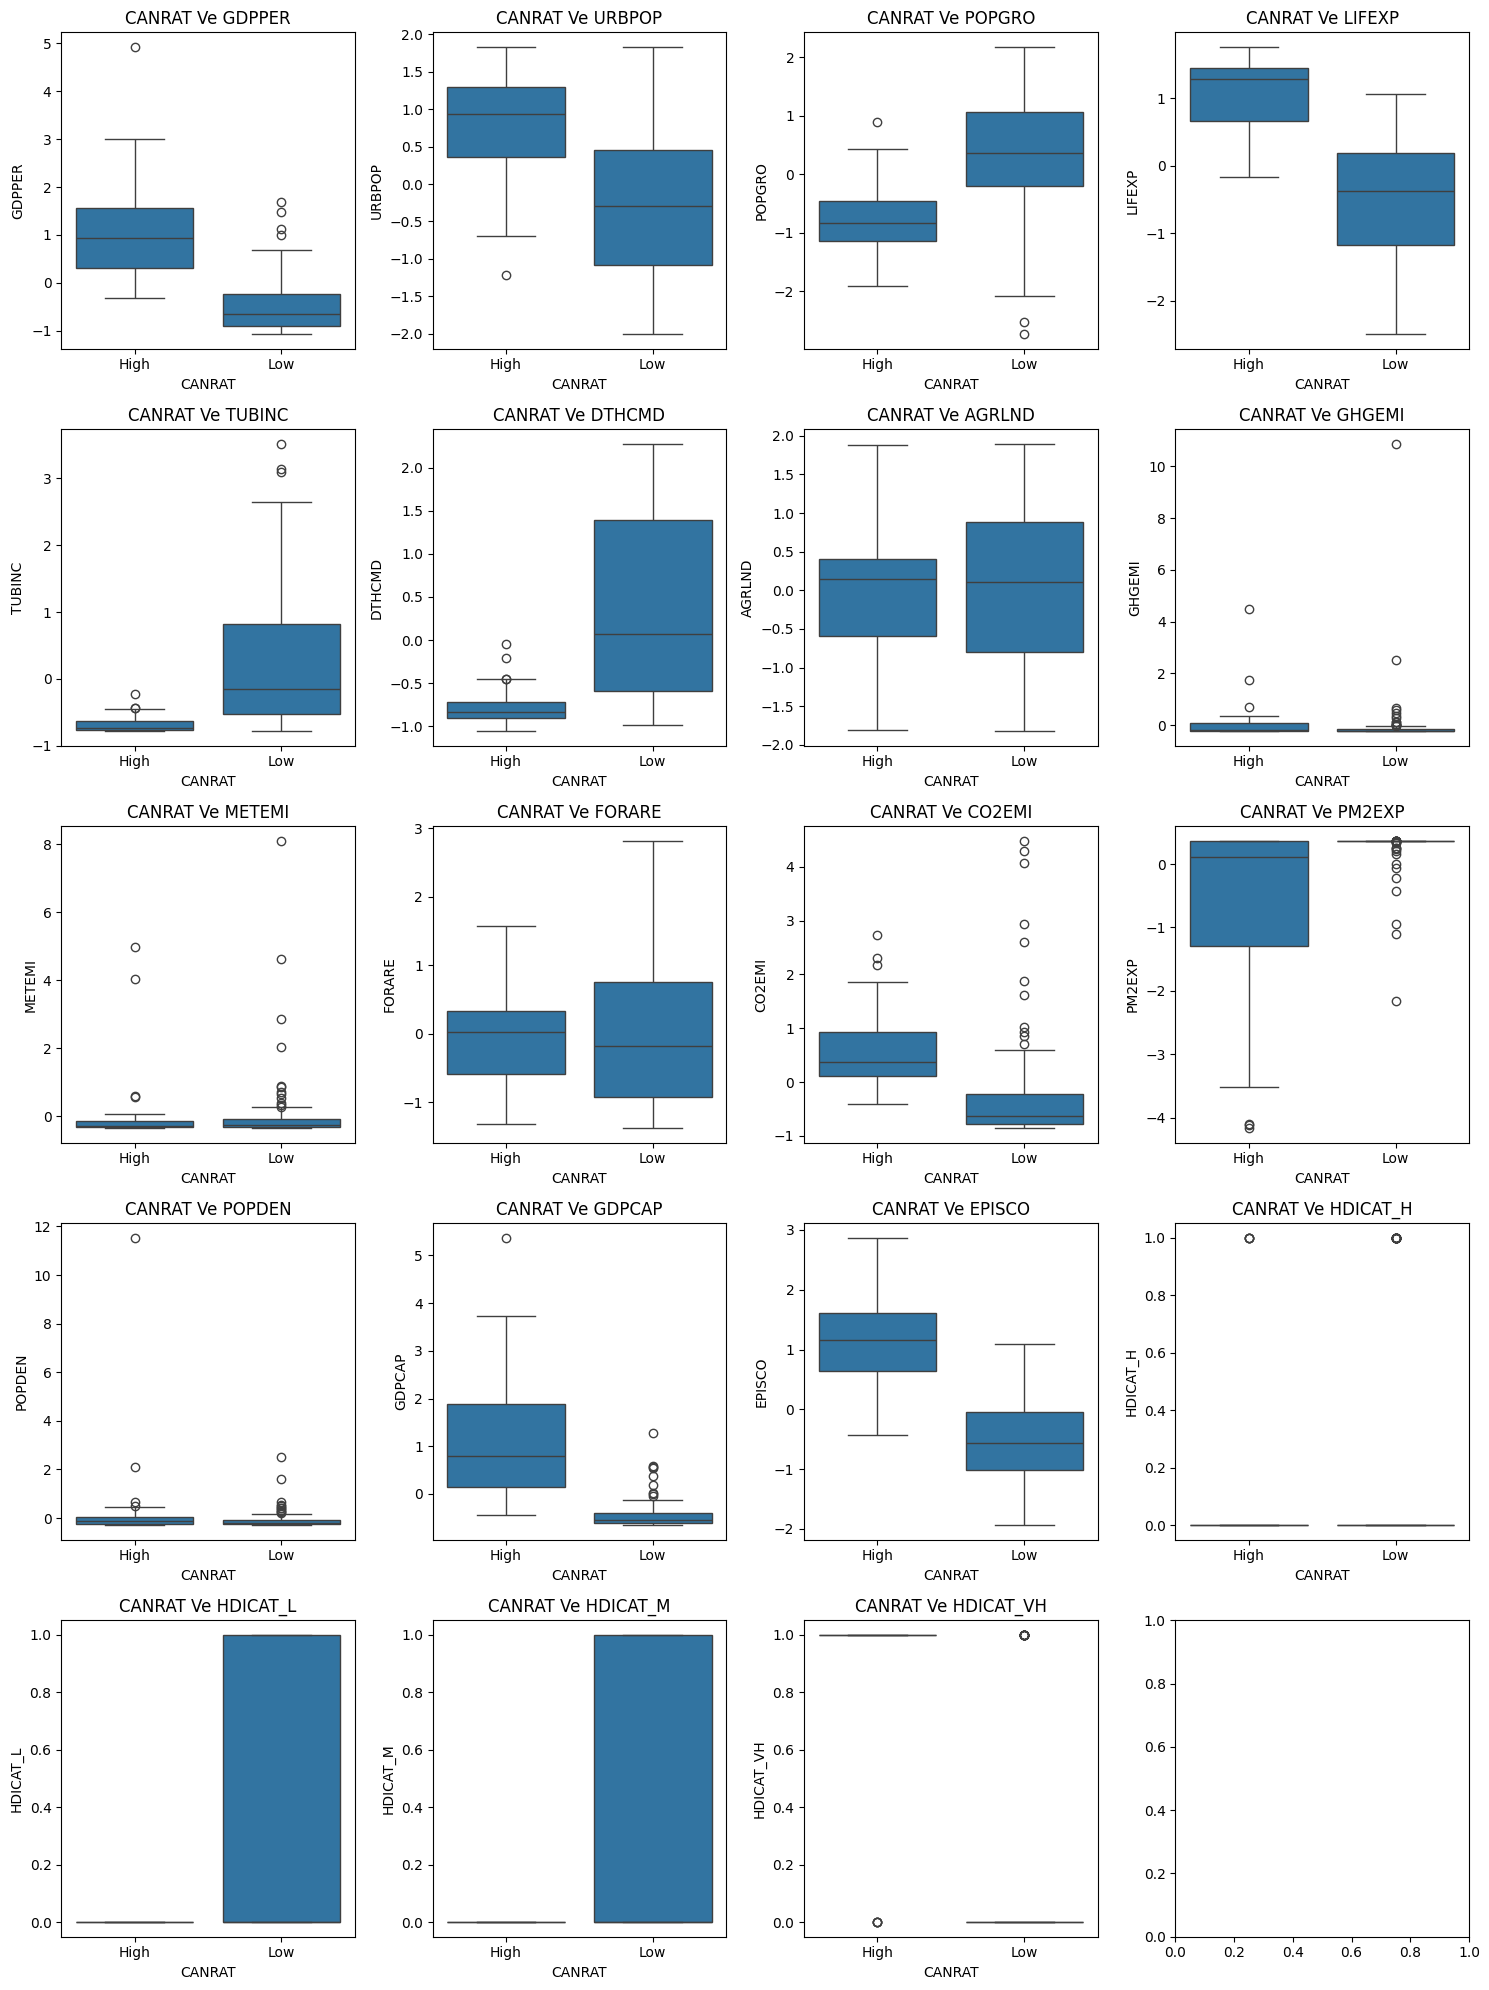

In [36]:
x_variables = crate_dpd.columns
y_variable = 'CANRAT'

num_rows = 5
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

axes = axes.ravel()

for i, x_variable in enumerate(x_variables):
    ax = axes[i]
    sns.boxplot(x=y_variable, y=x_variable, data=crate, ax=ax)
    ax.set_title(f'{y_variable} Ve {x_variable}')
    ax.set_xlabel(y_variable)
    ax.set_ylabel(x_variable)
    
    # Set tick locations and labels explicitly
    unique_labels = sorted(crate[y_variable].unique())
    ax.set_xticks(range(len(unique_labels)))
    ax.set_xticklabels(['High', 'Low'])

plt.tight_layout()
plt.show()

**Bivariante analysis:**
We noticed that the Cancer Rates(CANRAT) is high when:
Higher GDPCAP and GDPPER, Higher economic growth lead to advanced industrialization could potentially increase the risk
Higher URBPOP, the higher the urban population may have relationship with higher econic growth
Higher LIFEXP, The higher the life expectancy could lead to higher cancer’s risk because the older have more risk of cancer due to lower immune system.
Higher Episco, higher environment performance index could not be an indicator of higher cancer’s risk however, it may be due to in big city where there are environmental regulations in place.



### 3. Model Selection and Training

In [51]:
category_mapping = {'High': 1, 'Low': 0}
target = crate_pd['CANRAT'].map(category_mapping)
X_train, X_test, y_train, y_test = train_test_split(crate_dpd, target, test_size = 0.3, random_state= 600, stratify=target)

In [69]:
y_test.value_counts(normalize = True)

CANRAT
0    0.765957
1    0.234043
Name: proportion, dtype: float64

**Imbalanced data** :The data is highly imbalanced with the porpotion of almost 3:1

In [52]:
def model_performance_evaluation(y_true, y_pred):
    metric_name = ['Accuracy','Precision','Recall','F1','AUROC']
    metric_value = [accuracy_score(y_true, y_pred),
                   precision_score(y_true, y_pred),
                   recall_score(y_true, y_pred),
                   f1_score(y_true, y_pred),
                   roc_auc_score(y_true, y_pred)]    
    metric_summary = pd.DataFrame(zip(metric_name, metric_value),
                                  columns=['metric_name','metric_value']) 
    return(metric_summary)

#### Logistic Regression

In [53]:
lr = LogisticRegression()

grid = {
    'C': [1.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear','saga'],
    'class_weight': [None],
    'max_iter': [100],
    'random_state': [600]}


olr = GridSearchCV(estimator = lr, param_grid = grid, scoring='f1')

olr.fit(X_train, y_train)

olr.best_score_ 
olr.best_params_

/home/mobilis/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mobilis/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mobilis/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mobilis/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mobilis/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mobilis/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag

{'C': 1.0,
 'class_weight': None,
 'max_iter': 100,
 'penalty': 'l2',
 'random_state': 600,
 'solver': 'liblinear'}

In [57]:
y_hat = olr.predict(X_train)
olr_performance_train = model_performance_evaluation(y_train, y_hat) 

In [59]:
y_pred = olr.predict(X_test)
olr_performance_test = model_performance_evaluation(y_test, y_pred) 

In [60]:
display(olr_performance_train)

,metric_name,metric_value
0,Accuracy,0.962963
1,Precision,0.956522
2,Recall,0.880000
3,F1,0.916667
4,AUROC,0.933976


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [61]:
display(olr_performance_test)

,metric_name,metric_value
0,Accuracy,0.957447
1,Precision,0.909091
2,Recall,0.909091
3,F1,0.909091
4,AUROC,0.940657


**Discussion:**
We can observe that the model works well on both training and test data.

### Random Forest

In [63]:
rf = RandomForestClassifier()

grid = {
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [3,5,7],
    'min_samples_leaf': [3,5,10],
    'n_estimators': [100,150,200],
    'max_features':['sqrt', 'log2'],
    'random_state': [600]}


orf = GridSearchCV(estimator = rf, param_grid = grid, scoring='f1')

orf.fit(X_train, y_train)

orf.best_score_ 
orf.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'n_estimators': 100,
 'random_state': 600}

In [70]:
y_hat = orf.predict(X_train)
orf_performance_train = model_performance_evaluation(y_train, y_hat) 
y_pred = orf.predict(X_test)
orf_performance_test = model_performance_evaluation(y_test, y_pred)
display(orf_performance_train)
display(orf_performance_test)

,metric_name,metric_value
0,Accuracy,0.962963
1,Precision,0.956522
2,Recall,0.880000
3,F1,0.916667
4,AUROC,0.933976


,metric_name,metric_value
0,Accuracy,0.914894
1,Precision,0.888889
2,Recall,0.727273
3,F1,0.800000
4,AUROC,0.849747


**Discussion:**
We can observe the model is overfiting as the model does not really well on test data.

### Support Vector Machine

In [71]:
svc = SVC()

grid = {
    'C': [1.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'class_weight': [None],
    'random_state': [600]}


osvc = GridSearchCV(estimator = svc, param_grid = grid, scoring='f1')

osvc.fit(X_train, y_train)

osvc.best_score_ 
osvc.best_params_

{'C': 1.0, 'class_weight': None, 'kernel': 'rbf', 'random_state': 600}

In [74]:
y_hat = osvc.predict(X_train)
osvc_performance_train = model_performance_evaluation(y_train, y_hat) 
y_pred = osvc.predict(X_test)
osvc_performance_test = model_performance_evaluation(y_test, y_pred)
print("Evaluation on training data")
display(osvc_performance_train)
print("Evaluation on test data")
display(osvc_performance_test)

Evaluation on training data


,metric_name,metric_value
0,Accuracy,0.962963
1,Precision,0.956522
2,Recall,0.880000
3,F1,0.916667
4,AUROC,0.933976


Evaluation on test data


,metric_name,metric_value
0,Accuracy,0.978723
1,Precision,1.000000
2,Recall,0.909091
3,F1,0.952381
4,AUROC,0.954545


**Discussion:**
We can observe that the model works well on both training and test data.